![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [ ]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

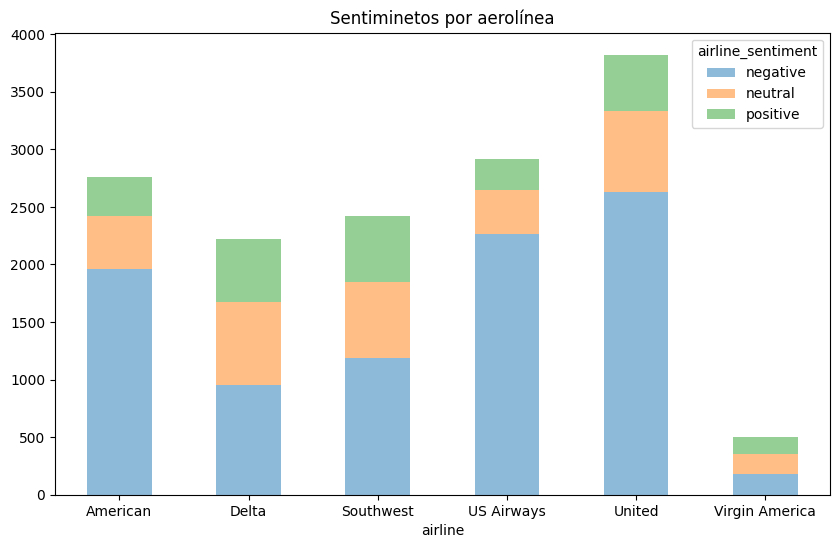

In [ ]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [ ]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

El accuracy del modelo es: 0.7725579470198676
El AUC del modelo es: 0.7533859727047874


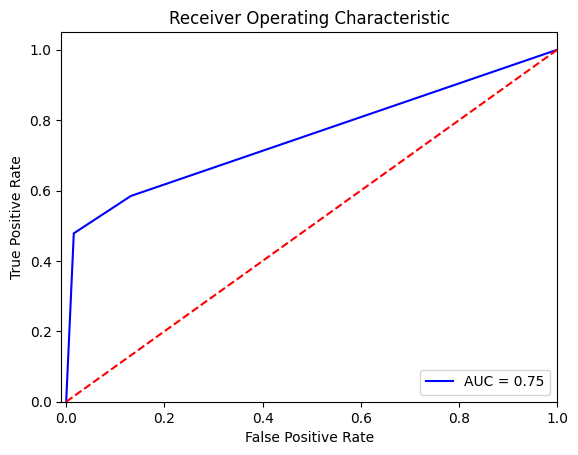

In [ ]:
# Celda 1
from sklearn.metrics import accuracy_score
from sklearn import metrics

vect = CountVectorizer()
X_train_A = vect.fit_transform(X_train)
X_test_A = vect.transform(X_test)
clf = RandomForestClassifier(random_state=1, n_estimators=100)
clf.fit(X_train_A, y_train)
y_pred = clf.predict(X_test_A)
acc_1 = accuracy_score(y_true=y_test, y_pred=y_pred)
print("El accuracy del modelo es: "+str(acc_1))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
AUC1=metrics.auc(fpr, tpr)
print("El AUC del modelo es: "+str(AUC1))
# Graficar curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

El accuracy del modelo es: 0.7667632450331126
El AUC del modelo es: 0.8164090796795899


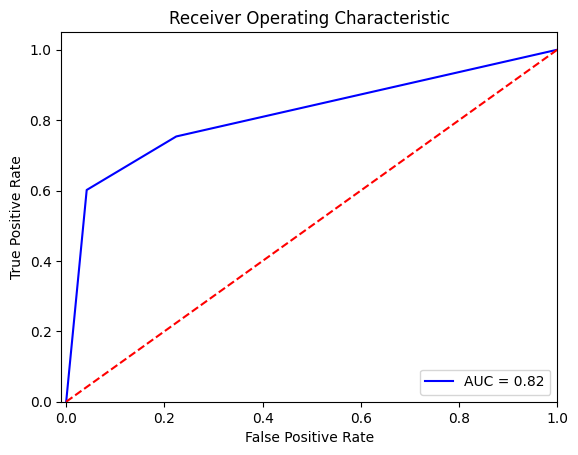

In [ ]:
# Celda 2
vect = CountVectorizer(stop_words='english')
X_train_A = vect.fit_transform(X_train)
X_test_A = vect.transform(X_test)
clf = RandomForestClassifier(random_state=1, n_estimators=100)
clf.fit(X_train_A, y_train)
y_pred = clf.predict(X_test_A)
acc_2 = accuracy_score(y_true=y_test, y_pred=y_pred)
print("El accuracy del modelo es: "+str(acc_2))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
AUC2=metrics.auc(fpr, tpr)
print("El AUC del modelo es: "+str(AUC2))
# Graficar curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


El accuracy del modelo es: 0.7593129139072847
El AUC del modelo es: 0.7294189967490667


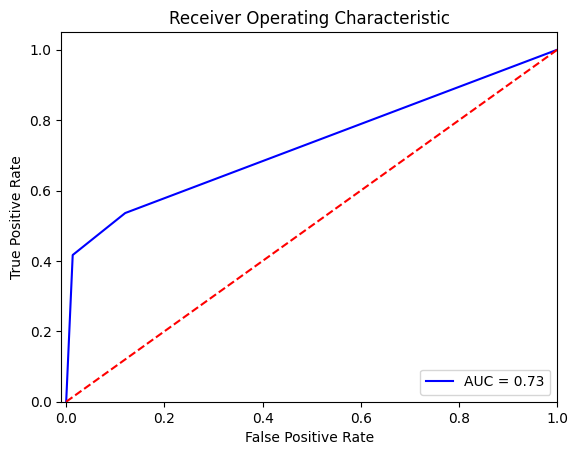

In [ ]:
# Celda 3
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

wordnet_lemmatizer = WordNetLemmatizer()
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]
vect = CountVectorizer(analyzer=split_into_lemmas)
X_train_A = vect.fit_transform(X_train)
X_test_A = vect.transform(X_test)
clf = RandomForestClassifier(random_state=1, n_estimators=100)
clf.fit(X_train_A, y_train)
y_pred = clf.predict(X_test_A)
acc_3 = accuracy_score(y_true=y_test, y_pred=y_pred)
print("El accuracy del modelo es: "+str(acc_3))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
AUC3=metrics.auc(fpr, tpr)
print("El AUC del modelo es: "+str(AUC3))
# Graficar curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

El accuracy del modelo es: 0.7593129139072847
El AUC del modelo es: 0.7294189967490667


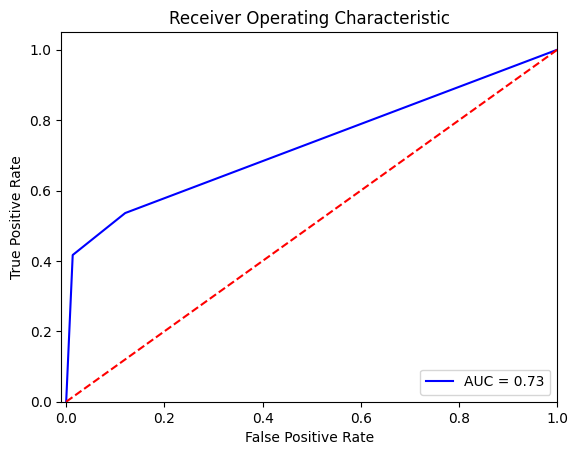

In [ ]:
# Celda 4
wordnet_lemmatizer = WordNetLemmatizer()
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]
vect = CountVectorizer(stop_words='english', analyzer=split_into_lemmas)
X_train_A = vect.fit_transform(X_train)
X_test_A = vect.transform(X_test)
clf = RandomForestClassifier(random_state=1, n_estimators=100)
clf.fit(X_train_A, y_train)
y_pred = clf.predict(X_test_A)
acc_4 = accuracy_score(y_true=y_test, y_pred=y_pred)
print("El accuracy del modelo es: "+str(acc_4))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
AUC4=metrics.auc(fpr, tpr)
print("El AUC del modelo es: "+str(AUC4))
# Graficar curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC4)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

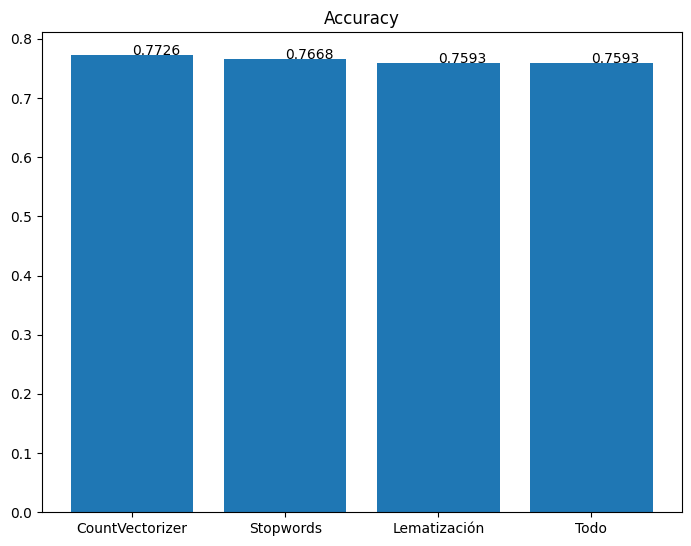

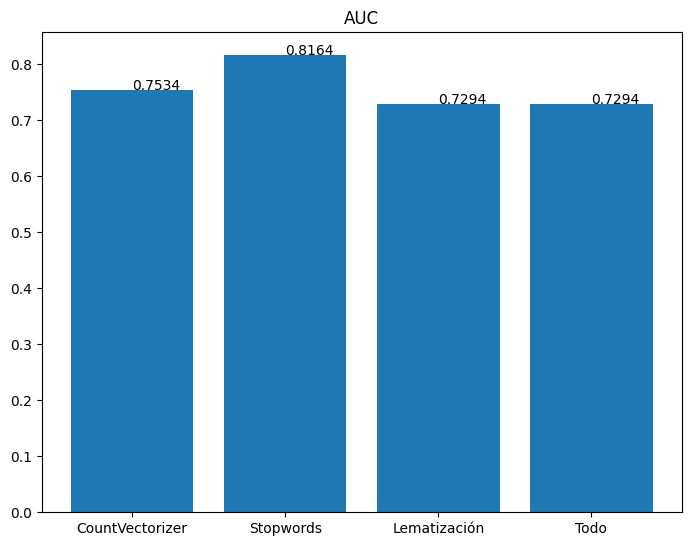

In [ ]:
# Celda 5
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Accuracy")
ejeX = ['CountVectorizer', 'Stopwords','Lematización','Todo']
ejeY = [round(acc_1,4),round(acc_2,4),round(acc_3,4),round(acc_4,4)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("AUC")
ejeX = ['CountVectorizer', 'Stopwords','Lematización','Todo']
ejeY = [round(AUC1,4),round(AUC2,4),round(AUC3,4),round(AUC4,4)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

**Conclusiones:**

En la construcción de los modelos con las diferentes técnicas de procesamiento de texto encontramos que el comportamiento es similar en cuanto al accuracy, dado que los modelos son similares, respecto a esta metrica  podemos concluir que para el ejercicio el mejor respecto al Accuracy es el CountVectorizer con un valor de 0.7726.

**Ventajas CountVectorizer**

El CountVectorizer es una técnica de vectorización de texto que se utiliza para contar la frecuencia de las palabras en un corpus de texto. Por lo tanto, parece ser el método más adecuado para este análisis de sentimientos, ya que permite identificar las palabras más utilizadas en los tweets y, por lo tanto, comprender mejor el sentimiento general del público sobre las diferentes aerolíneas.

Una de las características del CountVectorizer es la no eliminación de palabras, para este caso, esto puede ser beneficoso dado que los tweets son mensajes relativamente cortos que tratan de comunicar de forma breve, el uso del total palabras puede mejorar el ajuste del modelo dado que se puede manejar lenguaje no formal.

Para ConutVectorizer no es necesario un banco de palabras externo sino que usa el total de palabas, al tokenizar se puede usar de manera general, lo cual una ventaja es que es menos costoso.


**Desventajas de Lematización**

La lematización a menudo se basa en reglas que buscan reducir las palabras a su forma base, lo que puede hacer que se pierda información valiosa más que todo en un texto tan conciso como lo son los tweets. Por ejemplo, si un usuario utiliza una palabra en una forma conjugada, con bastantes adjetivos o en un contexto específico, la lematización puede no ser capaz de capturar ese significado.

Además, para realizar la lematización es necesario tener una lista de palabras lematizadas. Esta lista puede ser costosa de crear y mantener, y puede no estar disponible en todos los idiomas de forma estándar o para todos los tipos de palabras.

En este caso, la lematización puede no funcionar tan bien pues los tweets tienen jergas específicas, donde las palabras pueden tener significados diferentes a los que se encuentran en un diccionario estándar.

Adicional se decidieron usar otra métrica dado que los resultados son muy parecidos se integraron las curvas ROC  para poyarnos en la decisión en donde se evidencia que el mejor modelo para esta métrica es usando Stopwords con 0.8164.
